In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("res2.csv", delimiter=' ')
df

,n,mode,kind,time_us
0,500,combined,random,1918
1,600,combined,random,2089
2,700,combined,random,1464
3,800,combined,random,2556
4,900,combined,random,4144
...,...,...,...,...
5695,9500,default,almost_sorted,6712
5696,9600,default,almost_sorted,6733
5697,9700,default,almost_sorted,6728
5698,9800,default,almost_sorted,6749


In [9]:
sns.set_theme(style='darkgrid')
def prepare(ax, kind: str, mode: str):
    ax.set_title(f'{kind} ({mode})')
    yticks = np.arange(0, 10000+1, 1000)
    ax.set_yticks(yticks)
    yticks_minor = np.arange(0, 10000+1, 500)
    ax.set_yticks(yticks_minor, minor=True)
    
    xticks = np.arange(0, 10000+1, 1000)
    ax.set_xticks(xticks)
    xticks_minor = np.arange(0, 10000+1, 500)
    ax.set_xticks(xticks_minor, minor=True)    
    ax.grid(which='both')

### Ниже графики зависимости времени сортировки от размера входных данных (отдельно по каждому виду отсортированности данных и все вместе)

<Axes: title={'center': 'total (default)'}, xlabel='n', ylabel='time_us'>

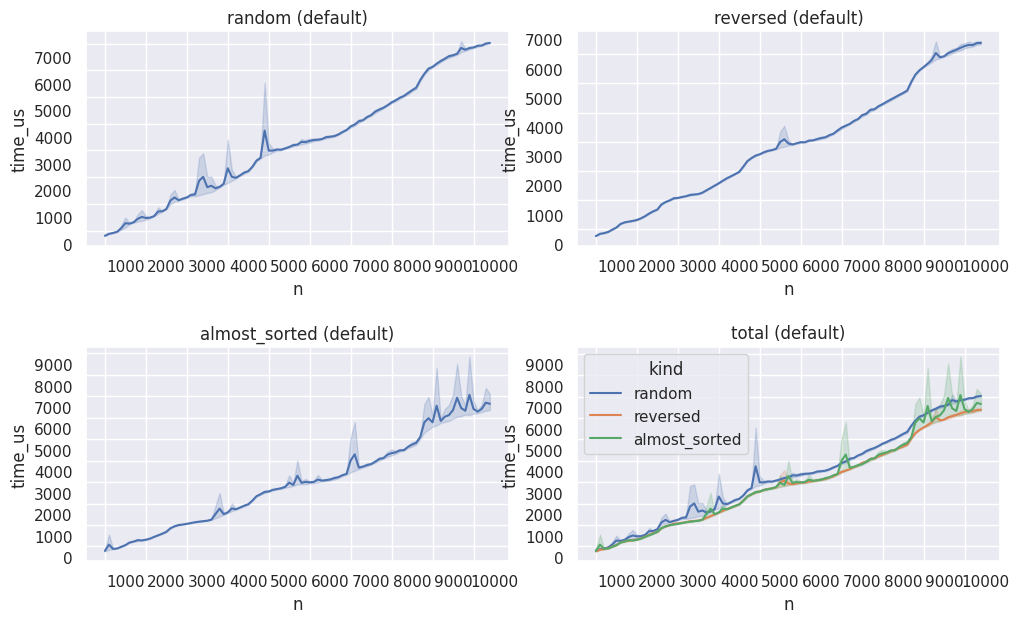

In [24]:
mode = 'default'
fig, ((rnd, rev), (alm, total)) = plt.subplots(2, 2, figsize=(10, 6), dpi=100)
fig.tight_layout(h_pad=4)
prepare(rnd, 'random', mode)
sns.lineplot(df[(df['mode'] == mode) & (df['kind'] == 'random')], x='n', y='time_us', ax=rnd)
prepare(rev, 'reversed', mode)
sns.lineplot(df[(df['mode'] == mode) & (df['kind'] == 'reversed')], x='n', y='time_us', ax=rev)
prepare(alm, 'almost_sorted', mode)
sns.lineplot(df[(df['mode'] == mode) & (df['kind'] == 'almost_sorted')], x='n', y='time_us', ax=alm)

prepare(total, 'total', mode)
sns.lineplot(df[df['mode'] == mode], x='n', y='time_us', hue='kind', ax=total)

### Ниже графики для MergeSort+InsertionSort (комбинированная, threshold=20)

<Axes: title={'center': 'total (combined)'}, xlabel='n', ylabel='time_us'>

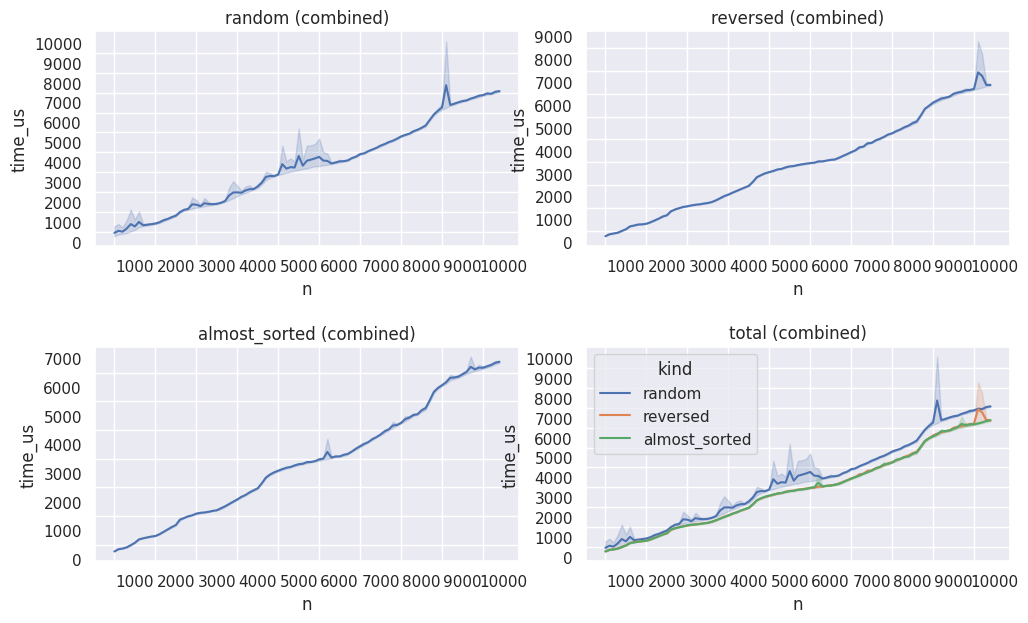

In [25]:
mode = 'combined'
fig, ((rnd, rev), (alm, total)) = plt.subplots(2, 2, figsize=(10, 6), dpi=100)
fig.tight_layout(h_pad=4)
prepare(rnd, 'random', mode)
sns.lineplot(df[(df['mode'] == mode) & (df['kind'] == 'random')], x='n', y='time_us', ax=rnd)
prepare(rev, 'reversed', mode)
sns.lineplot(df[(df['mode'] == mode) & (df['kind'] == 'reversed')], x='n', y='time_us', ax=rev)
prepare(alm, 'almost_sorted', mode)
sns.lineplot(df[(df['mode'] == mode) & (df['kind'] == 'almost_sorted')], x='n', y='time_us', ax=alm)

prepare(total, 'total', mode)
sns.lineplot(df[df['mode'] == mode], x='n', y='time_us', hue='kind', ax=total)

По данным на обоих группах графиков видно, что случайное расположение элементов требует **больше** времени для сортировки.

## Сравнение комбинированной сортировки и merge sort (по видам данных и в целом)

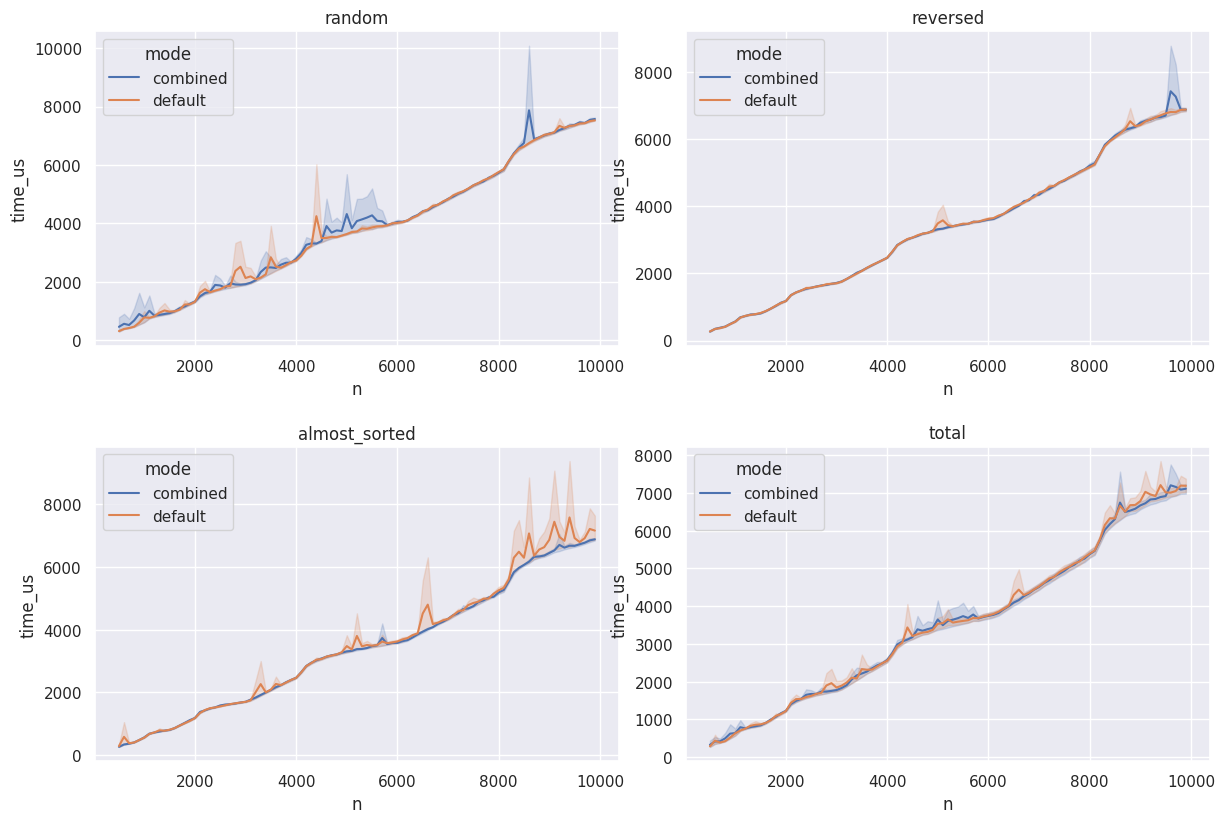

In [12]:
fig, ((a, b), (c, d)) = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(h_pad=4)
a.set_title('random')
sns.lineplot(df[df['kind'] == 'random'], x='n', y='time_us', hue='mode', ax=a)
b.set_title('reversed')
sns.lineplot(df[df['kind'] == 'reversed'], x='n', y='time_us', hue='mode', ax=b)
c.set_title('almost_sorted')
sns.lineplot(df[df['kind'] == 'almost_sorted'], x='n', y='time_us', hue='mode', ax=c)
d.set_title('total')
sns.lineplot(df, x='n', y='time_us', hue='mode', ax=d)
plt.show()

In [13]:
defa = df[df['mode'] == 'default'].groupby('n').agg({'time_us': 'mean'})
comb = df[df['mode'] == 'combined'].groupby('n').agg({'time_us': 'mean'})
print((defa / comb).mean())
defaG = defa[defa.index > 5000]
combG = comb[comb.index > 5000]
print((defaG / combG).mean())

time_us    1.001277
dtype: float64
time_us    1.00675
dtype: float64


### Проанализировав графики и данные, можно заметить: комбинированный способ работает лучше при больших `n` разница становится более значимой